Прежде чем сдать это задание, убедитесь, что все работает должным образом. 
Для этого следует "выполнить всё" в документе.

Убедитесь, что вы заполнили все места, где написано «ВАШ КОД ЗДЕСЬ» или «ВАШ ОТВЕТ ЗДЕСЬ».

In [ ]:
NAME = "Andrew Kotsevich"
COLLABORATORS = ""

In [19]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from scipy.interpolate import CubicSpline
from scipy.interpolate import lagrange
from scipy.interpolate import PchipInterpolator
from scipy.optimize import curve_fit

#  Вводное задание. 

Вектора х1 и у1 из архива дают значения некоторой функции $f(x) .$ Постройте на графике, используя библиотечные функции:

(a) Интерполяционный Лагранжев многочлен.

(b) Интерполяционный кубический сплайн (CubicSpline).

(c) Монотонный кубический интерполянт (PchipInterpolator).

(d)  Аппроксимацию полиномами, используя функции np. polyfit и np.polyval. 

---

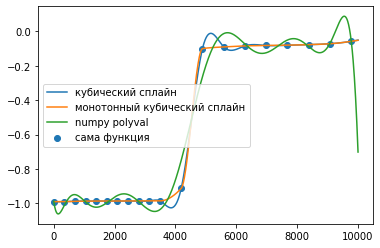

In [20]:
data = np.load("data_7_1.npz");
x1 = data['x1']
y1 = data['y1']
grid = np.linspace(1, 1e4, 1000)
lagr = lagrange(x1, y1)
cub_s = CubicSpline(x1, y1)
np_ploy1 = np.polyfit(x1, y1, 12)
pchip = PchipInterpolator(x1, y1) 
plt.plot(grid, cub_s(grid), label='кубический сплайн')
plt.plot(grid, pchip(grid), label='монотонный кубический сплайн')
plt.plot(grid, np.polyval(np_ploy1, grid), label='numpy polyval')
plt.scatter(x1, y1, label='сама функция')
plt.legend()

# Интерполяция полиномом Лагранжа.

Напишите класс, который конструирует интерполяционный полином Лагранжа, проходящий через точки, заданные как `xk` и `yk`.

In [21]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        # YOUR CODE HERE
        l = np.ones(len(self.xk))
        for i in range(len(self.xk)):
            for j in range(len(self.xk)):
                if i != j:
                    l[i] *= (x - self.xk[j]) / (self.xk[i] - self.xk[j])
        return np.sum(l * self.yk)
        
        raise NotImplementedError()

In [22]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

## Феномер Рунге

Рассмотрим функцию Рунге, $y = 1/(1 + 25x^2)$. Интерполируйте эту функцию на интервале $x\in [-2, 2]$, используя полином Лагранжа с $m=3, 5, 7, 11$. Используйте равномерную сетку. Нарисуйте результат интерполяции вместе с исходной функцией на одном графике. 

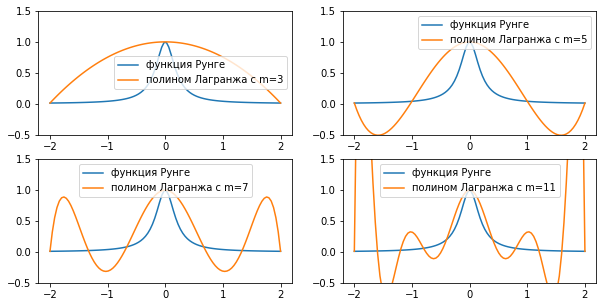

In [23]:
# YOUR CODE AND COMMENTS HERE
ms = [3, 5, 7, 11]
fig, axs = plt.subplots(2,2, figsize=(10, 5))
x = np.linspace(-2, 2, 100)
for i in range(4):
    xs = np.linspace(-2, 2, ms[i])
    ys = runge_func(xs)
    lagrange = LagrangeInterpolator(xs, ys)
    lagr_y = np.zeros(len(x))
    for j in range(len(x)):
      lagr_y[j] = lagrange(x[j])
    ax = axs.flatten()[i]
    ax.plot(x, runge_func(x), label='функция Рунге')
    ax.plot(x, lagr_y, label="полином Лагранжа с m="+str(ms[i]))
    ax.legend()
    ax.set_ylim(-0.5, 1.5)
plt.show()

Допишите функцию, которая возвращает узлы Чебышева. 

In [24]:
def cheb_nodes(n, a=-1, b=1):
    r"""Chebyshev nodes of degree $n$ on $[a, b]$
    """
    # YOUR CODE HERE
    ind = np.array(range(1, n + 1))
    return np.sort((a + b) / 2 + (b - a) / 2 * np.cos((2 * ind - 1) / 2 / n * np.pi))
    raise NotImplementedError()

In [25]:
nodes_11 = cheb_nodes(11)
nodes_11 = np.asarray(nodes_11)
assert (nodes_11[1:] > nodes_11[:-1]).all()

from scipy.special import roots_chebyt
nodes, weights = roots_chebyt(5) 

assert_allclose(cheb_nodes(5),
                nodes, atol=1e-14)

assert_allclose(cheb_nodes(5, a=-1, b=3),
                nodes*2 + 1, atol=1e-14)

Повторите интерполяцию Лагранжа функции Рунге с помощью узлов Чебышева. Постройте интерполянты.
Также постройте интерполяцию кубическим сплайном тех же данных (`scipy.interpolate.CubicSpline`).
Сравните величину явления Рунге для равномерной сетки и сетки Чебышева. Демонстрирует ли интерполяция сплайнами феномен Рунге?


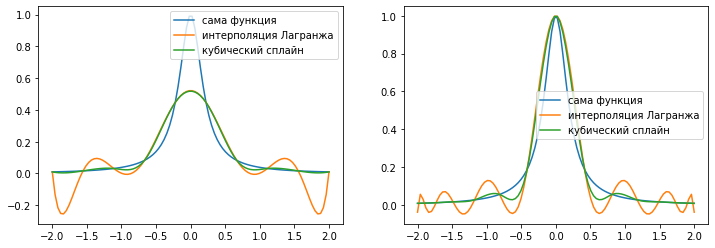

In [26]:
# YOUR CODE AND COMMENTS HERE
xs1 = np.linspace(-2, 2, 10) #без узлов Чебышева
m = 15  #число узлов Чебышева
xs2 = cheb_nodes(m, -2, 2) #с узлами Чебышева
ys1 = runge_func(xs1)
ys2 = runge_func(xs2)
lagr1 = LagrangeInterpolator(xs1, ys1)
lagr2 = LagrangeInterpolator(xs2, ys2)
x = np.linspace(-2, 2, 100)
lagr1_y = np.zeros(len(x))
for i in range(len(x)):
    lagr1_y[i] = lagr1(x[i])
lagr2_y = np.zeros(len(x))
for i in range(len(x)):
    lagr2_y[i] = lagr2(x[i])
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(x, runge_func(x), label='сама функция')
plt.plot(x, lagr1_y, label='интерполяция Лагранжа')
plt.plot(x, CubicSpline(xs1, ys1)(x), label='кубический сплайн')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(x, runge_func(x), label='сама функция')
plt.plot(x, lagr2_y, label='интерполяция Лагранжа')
plt.plot(x, CubicSpline(xs2, ys2)(x), label='кубический сплайн')
plt.legend()

Как видно, начиная с $m=15$ узлы Чебышева уменьшают феномен Рунге. Кубический сплайн более устойчив к осцилляциям.

Другим известным трудным тестом для интерполяции является следующая периодическая функция:

$u(x)=\frac{\sqrt{\varepsilon(2+\varepsilon)}}{2 \pi(1+\varepsilon-\cos x)}, \quad-\pi \leq x \leq \pi, \quad \varepsilon=0.21  $

Проведите аналогичные вычисления и постройте графики для неё.

In [27]:
def u(x, eps=0.21):
  return (eps* (2 + eps)) / 2 / np.pi / (1 + eps - np.cos(x))

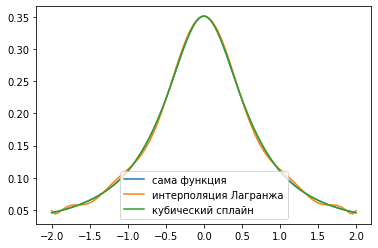

In [28]:
m = 13
xs = cheb_nodes(m, -2, 2)
ys = u(xs)
lagr = LagrangeInterpolator(xs, ys)
x = np.linspace(-2, 2, 100)
lagr_y = np.zeros(len(x))
for i in range(len(x)):
    lagr_y[i] = lagr(x[i])
plt.plot(x, u(x), label='сама функция')
plt.plot(x, lagr_y, label='интерполяция Лагранжа')
plt.plot(x, CubicSpline(xs, ys)(x), label='кубический сплайн')
plt.legend()

Постройте интерполяцию функций

$$
y_{1}(x)=\sin (6 x)+\sin \left(60 e^{x}\right), y_{2}(x)=\frac{1}{1+1000(x+0.5)^{2}}+\frac{1}{\sqrt{1+1000(x-0.5)^{2}}}
$$

на отрезке $[-1,1]$ полиномами Чебышева. Постройте зависимость ошибки приближения от количества узлов. Сколько узлов нужно удержать в каждом из этих случаев для получения достаточно точного приближения?

In [29]:
def y1(x):
    return np.sin(6 * x) + np.sin(60 * np.exp(x))
def y2(x):
    return 1 / (1 + 1000 * (x + 0.2)**2) + 1 / (1 + 1000 * (x-0.5)**2)**2

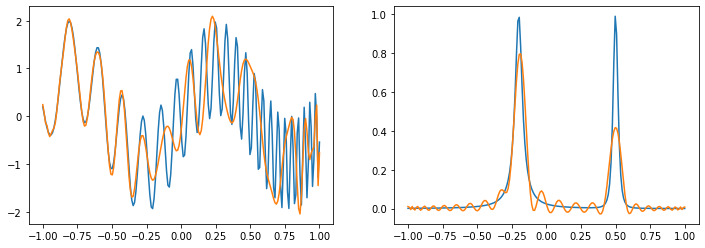

In [30]:
xs = np.linspace(-1, 1, 200)
y1s = y1(xs)
y2s = y2(xs)
m = 50 #число узлов
cheb1 = np.polynomial.chebyshev.Chebyshev.interpolate(y1, m)
cheb2 = np.polynomial.chebyshev.Chebyshev.interpolate(y2, m)
cheb_y1 = cheb1(xs)
cheb_y2 = cheb2(xs)
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(xs, y1s)
plt.plot(xs, cheb_y1)
plt.subplot(1, 2, 2)
plt.plot(xs, y2s)
plt.plot(xs, cheb_y2)
plt.show()

Построим зависимость ошибки приближения от количества узлов.

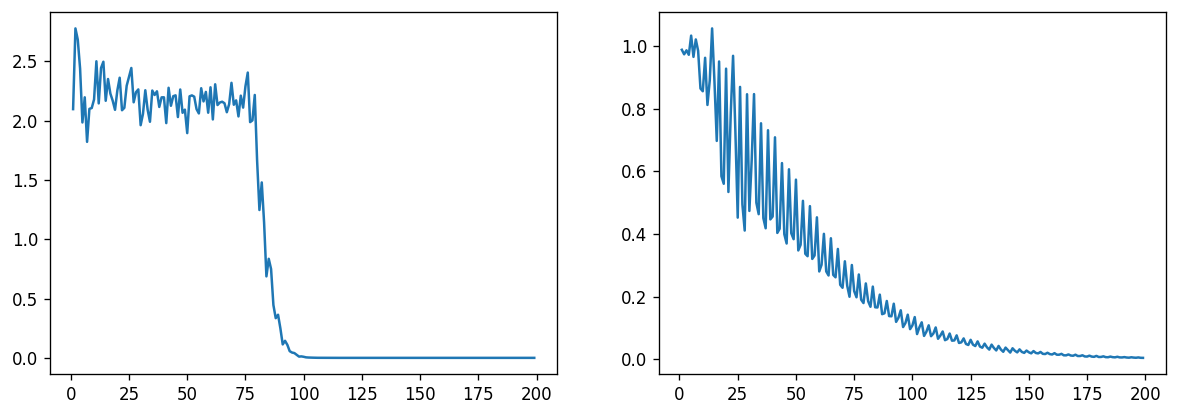

In [31]:
ms = np.arange(1, 200)
err1 = []
err2 = []
for m in ms:
  err1.append(np.asarray([np.abs(np.polynomial.chebyshev.Chebyshev.interpolate(y1, m)(xs) - y1(xs)).max()], dtype = float))
  err2.append(np.asarray([np.abs(np.polynomial.chebyshev.Chebyshev.interpolate(y2, m)(xs) - y2(xs)).max()], dtype = float))
plt.figure(figsize=(12,4), dpi=120)
plt.subplot(1, 2, 1)
plt.plot(ms, err1)
plt.subplot(1, 2, 2)
plt.plot(ms, err2)
plt.show()

Ошибка существенно падает при $m\sim120$.

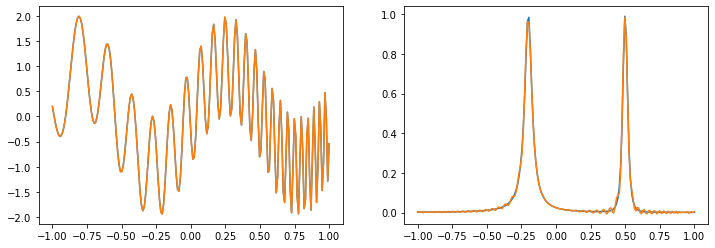

In [32]:
xs = np.linspace(-1, 1, 200)
y1s = y1(xs)
y2s = y2(xs)
m = 120 #число узлов
cheb1 = np.polynomial.chebyshev.Chebyshev.interpolate(y1, m)
cheb2 = np.polynomial.chebyshev.Chebyshev.interpolate(y2, m)
cheb_y1 = cheb1(xs)
cheb_y2 = cheb2(xs)
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(xs, y1s)
plt.plot(xs, cheb_y1)
plt.subplot(1, 2, 2)
plt.plot(xs, y2s)
plt.plot(xs, cheb_y2)
plt.show()

Вектора х4 и у4 из архива дают значения некоторой функции на равномерной сетке на отрезке [-0.75, 0.75]. Используя scipy . optimize.curve_fit, постройте интерполяцию функции $y(x)$ функциями вида

$$
y_{1}(x)=p_{0}+p_{1} x+p_{2} x^{2}+p_{3} x^{3}+p_{4} x^{4}+p_{5} x^{5}, y_{2}(x)=\frac{p_{0}+p_{1} x+p_{2} x^{2}+p_{3} x^{3}}{1+q_{1} x+q_{2} x^{2}}
$$


Какая из этих формул лучше описывает $y(x)$ на заданном интервале? Постройте график экстраполяции $y(x)$ за пределы исходных данных. Можете ли вы угадать аналитическое выражение для $y(x) ?$

In [37]:
def y1_int(x, p0, p1, p2, p3, p4, p5):
    return p0 + p1 * x + p2 * x**2 + p3 * x**3 + p4 * x**4 + p5 * x**5
def y2_int(x, p0, p1, p2, p3, q1, q2):
    return (p0 + p1 * x + p2 * x**2 + p3 * x**3) / (1 + q1 * x + q2 * x**2)

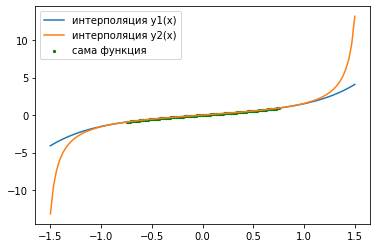

In [47]:
x4 = data['x4']
y4 = data['y4']
p1, *_ = curve_fit(y1_int, x4, y4)
p2, *_ = curve_fit(y2_int, x4, y4)
x = np.linspace(-1.5, 1.5, 100)
plt.scatter(x4, y4, s=5, label='сама функция', color="g") 
plt.plot(x, y1_int(x, *p1), label='интерполяция y1(x)')
plt.plot(x, y2_int(x, *p2), label='интерполяция y2(x)')
plt.legend()

Возможно, это тангенс.

Вектора х5 и у5 из архива задают некоторую функцию на равномерной сетке на отрезке $[-1,1] .$ 

Составьте соответствующий интерполяционный многочлен и постройте его график. Ожидаемо, получившийся интерполянт демонстрирует явление Рунге. Теперь проделайте замену переменной $x \rightarrow s$ по формуле $x=g(s)$, где
$$
g(s)=\frac{1}{53089}\left(40320 s+6720 s^{3}+3024 s^{5}+1800 s^{7}+1225 s^{9}\right)
$$

 функция, приближённо отображающая равномерную сетку в сетку узлов Чебышева. В новой переменной $s$, составьте интерполяционный многочлен $P(s) .$ Постройте график получившейся интерполяции исходной функции $P(s(x))$. Делает ли такая процедура явление Рунге менее выраженным? 

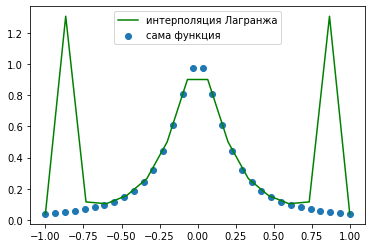

In [101]:
x5 = data["x5"]
y5 = data["y5"]
lagr = LagrangeInterpolator(x5, y5)
x = np.linspace(-1, 1, 16)
lagr_y = np.zeros(len(x))
for i in range(len(x)):
    lagr_y[i] = lagr(x[i])
plt.plot(x, lagr_y, label='интерполяция Лагранжа', color="g")
plt.scatter(x5, y5, label='сама функция')
plt.legend()

In [80]:
def g(s):
    return 1 / 53089 * (40320 * s + 6720 * s**3 + 3024 * s**5 + 1800 * s**7 + 1225 * s**9)

In [92]:
# вычисление g^-1
s = np.linspace(-1.001, 1.001, 1000)
x1 = g(s)
def g_inv(x):
    i = np.searchsorted(x1, x)
    return s[i-1] + (s[i] - s[i-1]) / (x1[i] - x1[i-1]) * (x - x1[i-1])

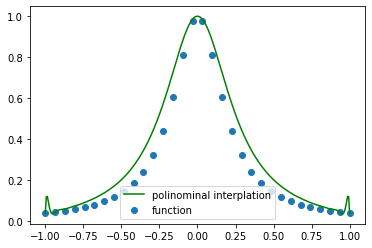

In [99]:
lagr_ch = LagrangeInterpolator(g_inv(x5), y5)
x = np.linspace(-1, 1, 300)
lagr_ys_ch = np.zeros(len(x))
for i in range(len(x)):
    lagr_ys_ch[i] = lagr_ch(x[i])
plt.plot(x, lagr_ys_ch, label='polinominal interplation', color='g')
plt.scatter(x5, y5, label='function')
plt.legend()

Как видно, явление Рунге сильно уменьшилось.